In [1]:
## Reading libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import warnings
from sklearn import metrics
from sklearn.metrics import mean_squared_error,log_loss
from sklearn.model_selection import KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import requests
from io import StringIO 
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

## EDA


In [2]:
train  = pd.read_excel("dataset.xlsx")

In [3]:
train.head()

,X,Y,Slope,Curvature,Aspect,TWI,FA,Drainage,Rainfall,SUSCEP
0,3.909444,7.443056,46.686142,-3.888000e+09,45.000000,-3.250368,147.0,228.8528,101.515616,Very_High
1,3.908611,7.442778,52.151768,1.296000e+09,60.945396,-4.313832,61.0,229.6781,80.409863,Very_High
2,3.908889,7.442778,66.484085,1.296000e+09,67.619865,-8.327622,1.0,230.5920,78.986849,Very_High
3,3.909167,7.442778,58.007183,-2.592000e+09,38.659809,-4.707937,51.0,235.4210,81.953151,Very_High
4,3.909444,7.442778,60.503792,-1.296000e+09,351.869904,-5.985817,15.0,234.4346,85.866027,Very_High


In [4]:
train.columns

Index(['X', 'Y', 'Slope', 'Curvature ', 'Aspect', 'TWI', 'FA', 'Drainage',
       'Rainfall', 'SUSCEP'],
      dtype='object')

In [5]:
train.dtypes

X             float64
Y             float64
Slope         float64
Curvature     float64
Aspect        float64
TWI           float64
FA            float64
Drainage      float64
Rainfall      float64
SUSCEP         object
dtype: object

In [6]:
train.describe(include='all')

,X,Y,Slope,Curvature,Aspect,TWI,FA,Drainage,Rainfall,SUSCEP
count,144401.000000,144401.000000,1.441190e+05,1.444010e+05,1.444010e+05,1.444010e+05,1.444010e+05,144401.000000,144401.000000,144401
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moderate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38116
mean,3.891534,7.374551,-2.502788e+35,-8.342043e+35,-1.673122e+35,-2.120858e+34,-2.120858e+35,219.714542,74.786932,NaN
std,0.027887,0.032459,9.225150e+36,1.682769e+37,7.543591e+36,2.686356e+36,8.492619e+36,7.057921,8.891617,NaN
min,3.831111,7.311389,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,203.729300,59.541096,NaN
25%,3.868889,7.348333,5.134019e+01,-2.592000e+09,1.013099e+02,-8.654586e+00,0.000000e+00,214.286900,68.140822,NaN
50%,3.891667,7.374167,6.198023e+01,0.000000e+00,1.900080e+02,-8.006991e+00,1.000000e+00,220.631300,73.873425,NaN
75%,3.913611,7.400278,6.916712e+01,2.592000e+09,2.700000e+02,-6.709276e+00,7.000000e+00,224.191400,81.329315,NaN


In [8]:
train.isnull().mean()

X             0.000000
Y             0.000000
Slope         0.001953
Curvature     0.000000
Aspect        0.000000
TWI           0.000000
FA            0.000000
Drainage      0.000000
Rainfall      0.000000
SUSCEP        0.000000
dtype: float64

## FILL IN MISSING VALUES AND ZEROS

In [9]:
#to replace all zero value with values before it 
train = train.replace(to_replace=0, method='ffill')

In [10]:
train = train.fillna(method='ffill')

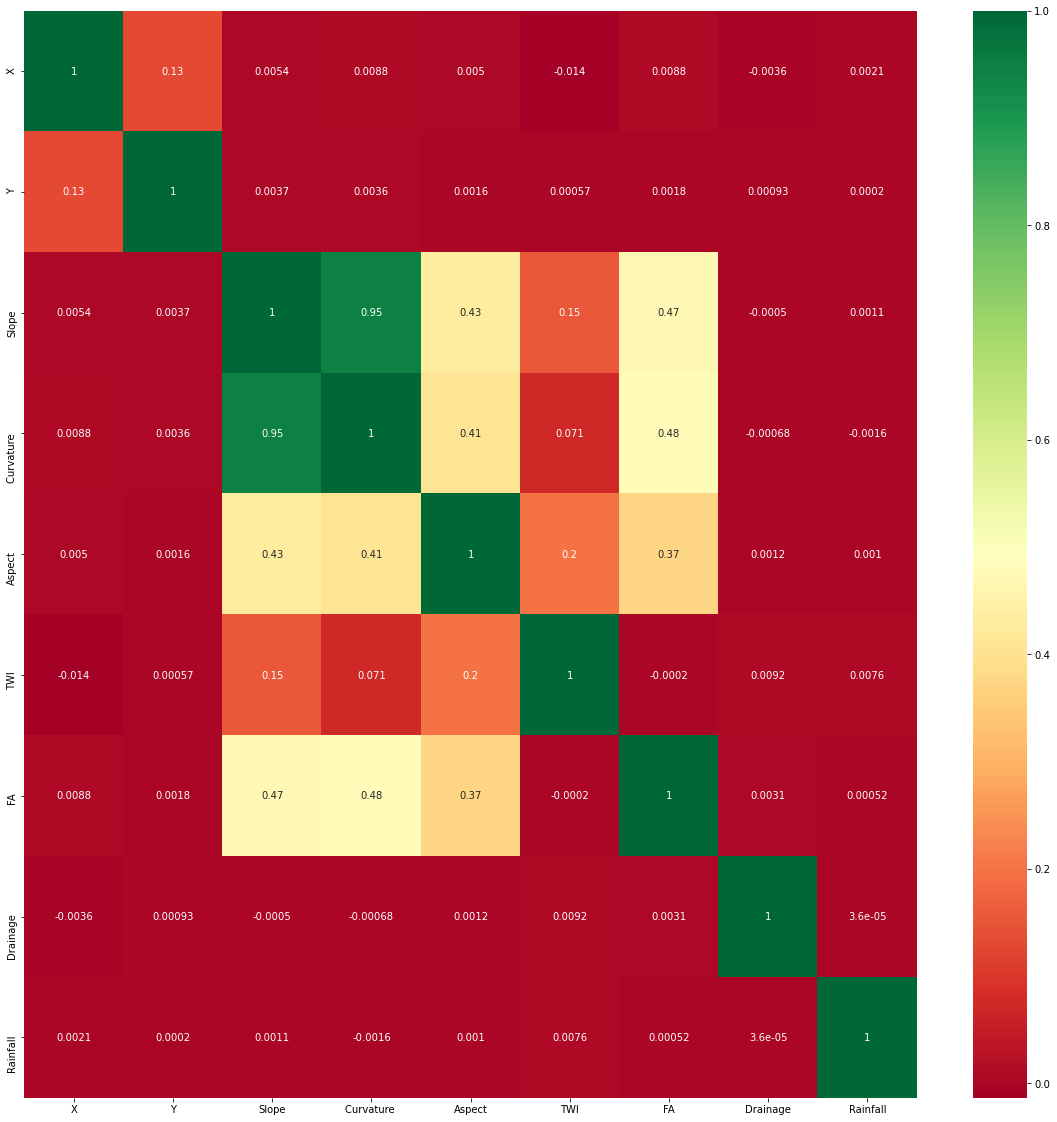

In [11]:
# Heat map of the data
corr_mat= train.corr()
top_corr_features = corr_mat.index
plt.figure(figsize=(20,20)) 
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
train.describe()

,X,Y,Slope,Curvature,Aspect,TWI,FA,Drainage,Rainfall
count,144401.000000,144401.000000,1.444010e+05,1.444010e+05,1.444010e+05,1.444010e+05,1.444010e+05,144401.000000,144401.000000
mean,3.891534,7.374551,-9.025431e+35,-8.342043e+35,-1.673122e+35,-2.120858e+34,-2.144424e+35,219.714542,74.786932
std,0.027887,0.032459,1.750163e+37,1.682769e+37,7.543591e+36,2.686356e+36,8.539640e+36,7.057921,8.891617
min,3.831111,7.311389,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,203.729300,59.541096
25%,3.868889,7.348333,5.105756e+01,-2.592000e+09,1.040362e+02,-8.654586e+00,1.000000e+00,214.286900,68.140822
50%,3.891667,7.374167,6.198023e+01,-1.296000e+09,1.913099e+02,-8.006991e+00,3.000000e+00,220.631300,73.873425
75%,3.913611,7.400278,6.916712e+01,2.592000e+09,2.700000e+02,-6.709276e+00,1.200000e+01,224.191400,81.329315
max,3.954444,7.443056,8.657541e+01,3.888000e+10,3.591449e+02,1.168344e+01,4.579360e+05,235.421000,101.515616


In [13]:
train['SUSCEP'].value_counts()

Moderate     38116
High         34451
Low          32252
Very_High    23456
No_Flood     16126
Name: SUSCEP, dtype: int64

In [14]:
def convert(x):
  if x =='Low':
    return 1
  elif x =='Moderate':
    return 2
  elif x == 'High':
    return 3
  elif x =='Very_High':
    return 4
  else:
    return 0

train['SUSCEP'] = train['SUSCEP'].apply(convert)

In [15]:
train.SUSCEP.value_counts()

2    38116
3    34451
1    32252
4    23456
0    16126
Name: SUSCEP, dtype: int64

In [16]:
#checking for missing values
train.isnull().sum()/train.shape[0]*100

X             0.0
Y             0.0
Slope         0.0
Curvature     0.0
Aspect        0.0
TWI           0.0
FA            0.0
Drainage      0.0
Rainfall      0.0
SUSCEP        0.0
dtype: float64

## FEATURE SELECTION

In [17]:
X = train.drop(['SUSCEP'],axis =1)
y = train['SUSCEP']

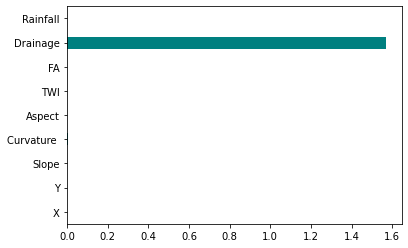

In [16]:
#Filter methods
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances,train.columns[0:len(train.columns)-1])
feat_importances.plot(kind='barh', color = 'teal')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
#from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score , accuracy_score

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Neural Network

In [20]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 5), random_state=1)
clf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 5), random_state=1,
              solver='lbfgs')

In [21]:
pred = clf.predict(X_test)

In [22]:
accuracy_score(y_test,pred)

0.2394307676326997

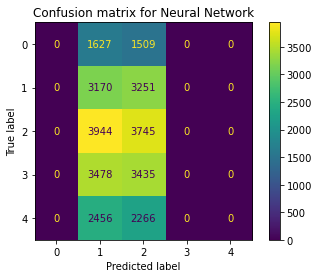

In [23]:
plot_confusion_matrix(clf, X_test, y_test)
plt.title('Confusion matrix for Neural Network')
plt.show()  

In [24]:
from sklearn.metrics import classification_report


# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,pred,labels=[0,1,2,3,4])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      3136
           1       0.22      0.49      0.30      6421
           2       0.26      0.49      0.34      7689
           3       0.00      0.00      0.00      6913
           4       0.00      0.00      0.00      4722

    accuracy                           0.24     28881
   macro avg       0.10      0.20      0.13     28881
weighted avg       0.12      0.24      0.16     28881



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


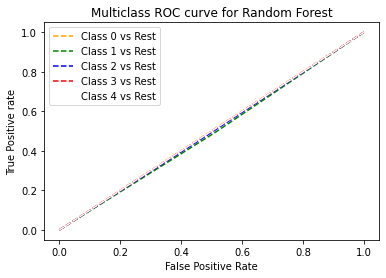

In [25]:
# fit model


pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='white', label='Class 4 vs Rest')
plt.title('Multiclass ROC curve for Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

## SVM

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [ ]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma='auto').fit(X, y)

In [ ]:
y_pred = svc.predict(X_test)
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
# Confusion matrix for SVM
import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()  

In [ ]:
#multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.metrics import classification_report


# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,y_pred,labels=[0,1,2,3,4])
print('Classification report : \n',matrix)

## KNN

In [22]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler




knn = KNeighborsClassifier(n_neighbors=10)



# for kNN, we need to scale features

knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

In [23]:
from sklearn.metrics import accuracy_score
knn_pred = knn.predict(X_test)
accuracy_score(y_test, knn_pred)

0.5980748589037775

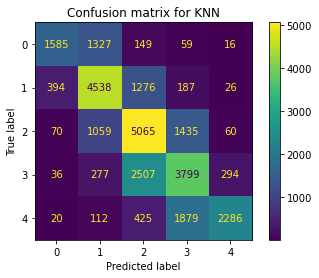

In [25]:
plot_confusion_matrix(knn, X_test, y_test)
plt.title('Confusion matrix for KNN')
plt.show()  

In [26]:
from sklearn.metrics import classification_report


# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,knn_pred,labels=[0,1,2,3,4])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.75      0.51      0.60      3136
           1       0.62      0.71      0.66      6421
           2       0.54      0.66      0.59      7689
           3       0.52      0.55      0.53      6913
           4       0.85      0.48      0.62      4722

    accuracy                           0.60     28881
   macro avg       0.66      0.58      0.60     28881
weighted avg       0.63      0.60      0.60     28881



## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3, random_state=17)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=17)

In [28]:
from sklearn.metrics import accuracy_score
tree_pred = tree.predict(X_test)
accuracy_score(y_test, tree_pred)

1.0

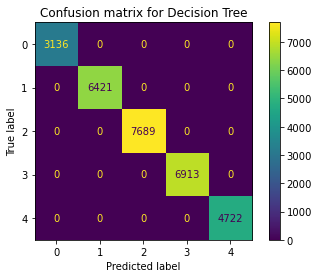

In [29]:
plot_confusion_matrix(tree, X_test, y_test)
plt.title('Confusion matrix for Decision Tree')
plt.show()

In [30]:
from sklearn.metrics import classification_report


# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,tree_pred,labels=[0,1,2,3,4])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3136
           1       1.00      1.00      1.00      6421
           2       1.00      1.00      1.00      7689
           3       1.00      1.00      1.00      6913
           4       1.00      1.00      1.00      4722

    accuracy                           1.00     28881
   macro avg       1.00      1.00      1.00     28881
weighted avg       1.00      1.00      1.00     28881



  ## Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier as rf

clf = rf(max_depth = 2, random_state = 0)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)


In [32]:
accuracy_score(y_pred,y_test)

0.7304802465288598

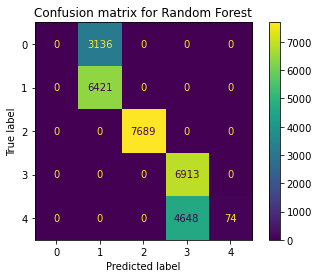

In [33]:
plot_confusion_matrix(clf, X_test, y_test)
plt.title('Confusion matrix for Random Forest')
plt.show()

In [34]:
from sklearn.metrics import classification_report


# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,y_pred,labels=[0,1,2,3,4])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      3136
           1       0.67      1.00      0.80      6421
           2       1.00      1.00      1.00      7689
           3       0.60      1.00      0.75      6913
           4       1.00      0.02      0.03      4722

    accuracy                           0.73     28881
   macro avg       0.65      0.60      0.52     28881
weighted avg       0.72      0.73      0.63     28881



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


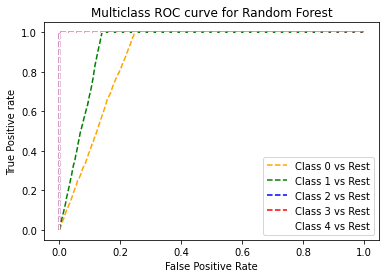

In [35]:
# fit model

pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='white', label='Class 4 vs Rest')
plt.title('Multiclass ROC curve for Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

## Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
accuracy_score(y_pred,y_test)

0.10858349780132266

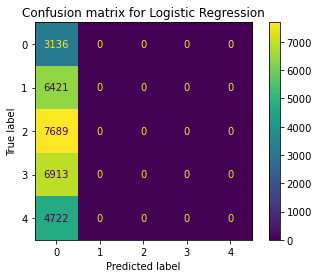

In [38]:
plot_confusion_matrix(clf, X_test, y_test)
plt.title('Confusion matrix for Logistic Regression')
plt.show()

In [39]:
from sklearn.metrics import classification_report


# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,y_pred,labels=[0,1,2,3,4])
print('Classification report for Logistic regression : \n',matrix)

Classification report for Logistic regression : 
               precision    recall  f1-score   support

           0       0.11      1.00      0.20      3136
           1       0.00      0.00      0.00      6421
           2       0.00      0.00      0.00      7689
           3       0.00      0.00      0.00      6913
           4       0.00      0.00      0.00      4722

    accuracy                           0.11     28881
   macro avg       0.02      0.20      0.04     28881
weighted avg       0.01      0.11      0.02     28881



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


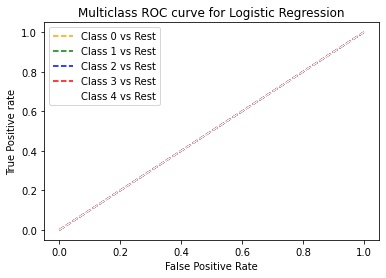

In [40]:
# fit model

pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='white', label='Class 4 vs Rest')
plt.title('Multiclass ROC curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

## Naives Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train,y_train)

accuracy_score(y_test,model.predict(X_test))


0.2396038918320003

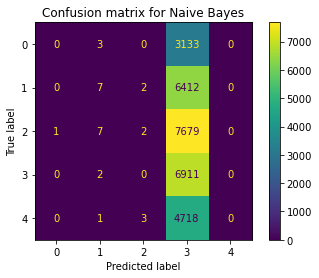

In [42]:
plot_confusion_matrix(model, X_test, y_test)
plt.title('Confusion matrix for Naive Bayes')
plt.show()

In [43]:
from sklearn.metrics import classification_report


# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,pred,labels=[0,1,2,3,4])
print('Classification report for Logistic regression : \n',matrix)

Classification report for Logistic regression : 
               precision    recall  f1-score   support

           0       0.11      1.00      0.20      3136
           1       0.00      0.00      0.00      6421
           2       0.00      0.00      0.00      7689
           3       0.00      0.00      0.00      6913
           4       0.00      0.00      0.00      4722

    accuracy                           0.11     28881
   macro avg       0.02      0.20      0.04     28881
weighted avg       0.01      0.11      0.02     28881



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


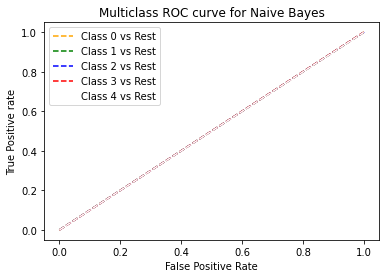

In [44]:
# fit model

pred = model.predict(X_test)
pred_prob = model.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='white', label='Class 4 vs Rest')
plt.title('Multiclass ROC curve for Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

## K-FOLD SPLIT

In [45]:
train  = pd.read_csv("pluvialflood.csv")
def convert(x):
  if x =='Low':
    return 1
  elif x =='Moderate':
    return 2
  elif x == 'High':
    return 3
  elif x =='Very_High':
    return 4
  else:
    return 0

train['SUSCEP'] = train['SUSCEP'].apply(convert)

X = train.drop(['SUSCEP'],axis =1)
y = train['SUSCEP']

In [46]:
from sklearn.model_selection import RepeatedKFold 
kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 

for train_index, test_index in kf.split(X):
    print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y[train_index], y[test_index]

Train: [     1      2      3 ... 144398 144399 144400] Validation: [     0     14     25 ... 144389 144392 144394]
Train: [     0      1      2 ... 144398 144399 144400] Validation: [    40     64     66 ... 144379 144386 144391]
Train: [     0      1      2 ... 144397 144398 144399] Validation: [     4     24     52 ... 144377 144387 144400]
Train: [     0      1      2 ... 144398 144399 144400] Validation: [     5     13     19 ... 144371 144385 144390]
Train: [     0      1      2 ... 144396 144398 144400] Validation: [     8     11     32 ... 144393 144397 144399]
Train: [     0      1      2 ... 144398 144399 144400] Validation: [     9     16     35 ... 144362 144375 144381]
Train: [     0      3      4 ... 144397 144399 144400] Validation: [     1      2     22 ... 144376 144380 144398]
Train: [     0      1      2 ... 144398 144399 144400] Validation: [     7     26     48 ... 144340 144361 144369]
Train: [     0      1      2 ... 144398 144399 144400] Validation: [    12     2

Train: [     0      1      2 ... 144398 144399 144400] Validation: [    10     25     31 ... 144386 144394 144395]
Train: [     0      1      2 ... 144398 144399 144400] Validation: [    14     28     29 ... 144370 144375 144389]
Train: [     1      2      3 ... 144398 144399 144400] Validation: [     0     17     32 ... 144376 144384 144396]
Train: [     0      2      3 ... 144398 144399 144400] Validation: [     1      4      5 ... 144354 144369 144387]
Train: [     0      1      2 ... 144398 144399 144400] Validation: [     8     16     18 ... 144355 144377 144383]
Train: [     0      1      2 ... 144396 144398 144400] Validation: [     3      7     15 ... 144393 144397 144399]
Train: [     0      1      2 ... 144398 144399 144400] Validation: [    24     37     40 ... 144376 144377 144379]
Train: [     0      1      2 ... 144398 144399 144400] Validation: [     3      4      5 ... 144344 144386 144397]
Train: [     0      1      2 ... 144398 144399 144400] Validation: [    16     2

## Neural Network

In [47]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 5), random_state=1)
clf.fit(X_train,y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 5), random_state=1,
              solver='lbfgs')

In [48]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.2578254847645429

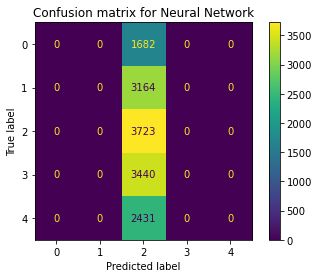

In [49]:
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)
plt.title('Confusion matrix for Neural Network')
plt.show()  

In [50]:
from sklearn.metrics import classification_report


# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,pred,labels=[0,1,2,3,4])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1682
           1       0.00      0.00      0.00      3164
           2       0.26      1.00      0.41      3723
           3       0.00      0.00      0.00      3440
           4       0.00      0.00      0.00      2431

    accuracy                           0.26     14440
   macro avg       0.05      0.20      0.08     14440
weighted avg       0.07      0.26      0.11     14440



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


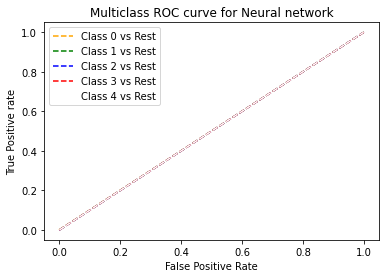

In [51]:
# fit model
#multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='white', label='Class 4 vs Rest')
plt.title('Multiclass ROC curve for Neural network')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

## SVM

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [53]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma='auto').fit(X, y)

In [ ]:
y_pred = svc.predict(X_test)
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
# Confusion matrix for SVM
import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(svc, X_test, y_test)  
plt.title('The confusion matrix for SVM')
plt.show()  

In [ ]:
#multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.metrics import classification_report


# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,y_pred,labels=[0,1,2,3,4])
print('Classification report : \n',matrix)

## KNN

In [54]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler




knn = KNeighborsClassifier(n_neighbors=10)



# for kNN, we need to scale features

knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

In [55]:
from sklearn.metrics import accuracy_score
knn_pred = knn.predict(X_test)
accuracy_score(y_test, knn_pred)

0.9990304709141274

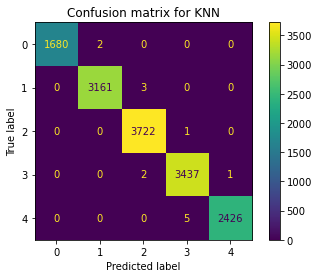

In [56]:
plot_confusion_matrix(knn, X_test, y_test)
plt.title('Confusion matrix for KNN')
plt.show()  

In [57]:
from sklearn.metrics import classification_report


# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,knn_pred,labels=[0,1,2,3,4])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1682
           1       1.00      1.00      1.00      3164
           2       1.00      1.00      1.00      3723
           3       1.00      1.00      1.00      3440
           4       1.00      1.00      1.00      2431

    accuracy                           1.00     14440
   macro avg       1.00      1.00      1.00     14440
weighted avg       1.00      1.00      1.00     14440



## Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3, random_state=17)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=17)

In [59]:
from sklearn.metrics import accuracy_score
tree_pred = tree.predict(X_test)
accuracy_score(y_test, tree_pred)

1.0

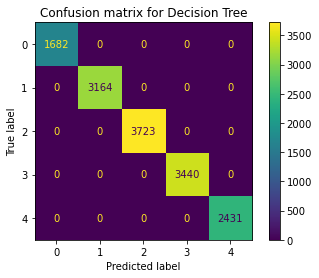

In [60]:
plot_confusion_matrix(tree, X_test, y_test)
plt.title('Confusion matrix for Decision Tree')
plt.show()

In [61]:
from sklearn.metrics import classification_report


# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,tree_pred,labels=[0,1,2,3,4])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1682
           1       1.00      1.00      1.00      3164
           2       1.00      1.00      1.00      3723
           3       1.00      1.00      1.00      3440
           4       1.00      1.00      1.00      2431

    accuracy                           1.00     14440
   macro avg       1.00      1.00      1.00     14440
weighted avg       1.00      1.00      1.00     14440



## Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier as rf

clf = rf(max_depth = 2, random_state = 0)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [63]:
accuracy_score(y_pred,y_test)

0.7161357340720221

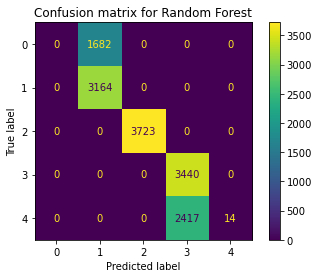

In [64]:
plot_confusion_matrix(clf, X_test, y_test)
plt.title('Confusion matrix for Random Forest')
plt.show()

In [65]:
from sklearn.metrics import classification_report


# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,y_pred,labels=[0,1,2,3,4])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1682
           1       0.65      1.00      0.79      3164
           2       1.00      1.00      1.00      3723
           3       0.59      1.00      0.74      3440
           4       1.00      0.01      0.01      2431

    accuracy                           0.72     14440
   macro avg       0.65      0.60      0.51     14440
weighted avg       0.71      0.72      0.61     14440



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


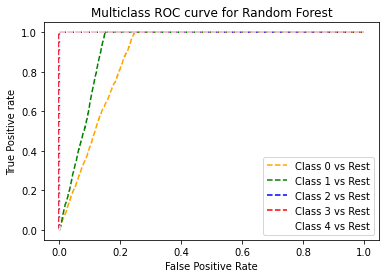

In [66]:
# fit model

pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='white', label='Class 4 vs Rest')
plt.title('Multiclass ROC curve for Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

## Logistic regression

In [67]:
from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
accuracy_score(y_pred,y_test)

1.0

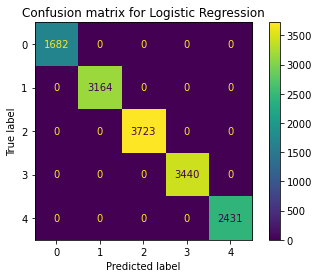

In [69]:
plot_confusion_matrix(clf, X_test, y_test)
plt.title('Confusion matrix for Logistic Regression')
plt.show()

In [70]:
from sklearn.metrics import classification_report


# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,y_pred,labels=[0,1,2,3,4])
print('Classification report for Logistic regression : \n',matrix)

Classification report for Logistic regression : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1682
           1       1.00      1.00      1.00      3164
           2       1.00      1.00      1.00      3723
           3       1.00      1.00      1.00      3440
           4       1.00      1.00      1.00      2431

    accuracy                           1.00     14440
   macro avg       1.00      1.00      1.00     14440
weighted avg       1.00      1.00      1.00     14440



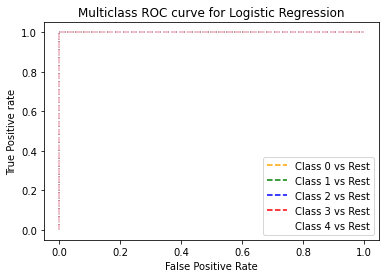

In [71]:
# fit model

pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='white', label='Class 4 vs Rest')
plt.title('Multiclass ROC curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

## Naive Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train,y_train)

accuracy_score(y_test,model.predict(X_test))


1.0

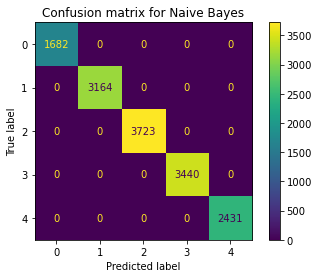

In [73]:
plot_confusion_matrix(model, X_test, y_test)
plt.title('Confusion matrix for Naive Bayes')
plt.show()

In [74]:
from sklearn.metrics import classification_report


# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,model.predict(X_test),labels=[0,1,2,3,4])
print('Classification report for Naive Bayes : \n',matrix)

Classification report for Naive Bayes : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1682
           1       1.00      1.00      1.00      3164
           2       1.00      1.00      1.00      3723
           3       1.00      1.00      1.00      3440
           4       1.00      1.00      1.00      2431

    accuracy                           1.00     14440
   macro avg       1.00      1.00      1.00     14440
weighted avg       1.00      1.00      1.00     14440

